## Biblioteca igraph

In [1]:
from igraph import *

Criação de um grafo não-direcionado sem vértices ou arestas.  
* Cuidado com as nomenclaturas de Aresta e Arcos. Arestas = grafos não direcionados; Arcos = Grafos direcionados.

In [3]:
g = Graph()

Adição de *n* vértices ao grafo *g*

In [5]:
g.add_vertices(3)

Adição de arcos através da referência de duas vértices pré-existentes. O igraph se utiliza de números inteiros para representar IDs das vértices, começando do zero.
Arcos são especificados por pares de inteiros.
Através da função:
>**.add_edges(*Lista de IDs das Vértices*)**  

Podemos passar uma lista contendo os pares de vértices que serão associadas(ou apenas uma tupla contendo um par, no caso da adição de apenas uma vértice).

In [6]:
g.add_edges([(0, 1), (0, 2)])

In [28]:
print(g) #OUTPUT: IGRAPH U--- VERTICES  ARESTAS --

IGRAPH U--- 3 2 --
+ attr: Data (g), date (g), Gênero (v), Idade (v), Nome (v), CONHECE (e)
+ edges:
0--1 0--2


**Arestas** também **possuem IDs**, de forma similar aos vértices.
Ao apagar uma vértice, as demais necessárias serão renumeradas, para a manutenção da ordem numérica.

>Arestas podem ser deletadas através da função:  
>
>**.delete_vertices(*Lista de IDs*)**  
***
Caso você **não souber o ID de uma aresta que você deseja deletar**, porém, sabe os **IDs das vértices em ambos os pontos finais**, você pode **recuperar o ID da aresta que conecta-os**, através da função:
>**.get_eid(*IDs extremidades*)**  

In [54]:
g.delete_vertices((0,2))

> O comando **summary()** pode ser utilizado para obter uma visão geral de um dado objeto grafo.

In [27]:
summary(g) #OUTPUT: IGRAPH U--- VERTICES  ARESTAS -- tal como utilizar o print, porém, de maneira mais "limpa"

IGRAPH U--- 3 2 -- 
+ attr: Data (g), date (g), Gênero (v), Idade (v), Nome (v), CONHECE (e)


### Geradores de Grafos

igraph possui um largo conjunto de geradores de grafos, que podem ser divididos em dois grupos:
   - **Determinístico**: Produzem o mesmo tipo de grafo quando chamado com os mesmo parâmetros;  
       - Incluem métodos para criação de árvores,grades regulares, anéis, *extended chordal rings*. 
   - **Estocásticos (indeterminado)**: Produzem um grafo diferente toda vez.
       - Usados para criar redes aleatórias Erdős-Rényi, redes Barabási-Albert, grafos geométricos aleatórios.




**Graph.Tree()** gerá uma árvore regular.  
- Pode ser gerada com n vértices e cada vértice (partindo das folhas) possuem m filhos. Não importa quantas vezes chamamos a função, o grafo será sempre o mesmo sobre parâmetros equivalente.

> var = Graph.Tree(n, m)

In [61]:
g = Graph.Tree(127, 40)

> **Método .get_edgelist()**
> - Retorna uma lista que contêm pares de inteiros, uma para cada aresta. O primeiro membro do par é o ID do vértice da fonte, e o segundo membro é o ID do vértice alvo da aresta correspondente.

In [43]:
g.get_edgelist()

[(0, 1), (0, 2), (2, 3), (3, 4), (2, 4), (2, 5), (0, 5), (3, 6), (5, 6)]

> **Graph.GRG()**
>- gerá um grafo geométrico aleaório.

>***Grafo_Um.isomorphic*(*Grafo_Dois*)**
>- mostra se dois grafos são isomórficos ou não.

### Definindo e Recuperando Propriedades

Propriedades: Objetos auxiliares associados a uma dada vértice ou aresta de um grafo, ou até mesmo a um grafo como um todo.  

---
Todo Grafo igraph, vértice e arco se comporta como um dicionário Python em um certo sentido: você pode adicionar pares de valores-chave para qualquer um deles, com a chave representando o nome de seu atributo (a única restrição é que deve ser uma String) e o valor representando o atributo por si só.

Todo objeto Grafo possui dois elementos especial chamados ***`vs`*** e ***`es`***, fixados para a sequência de todos os vértices e todos os arcos, respectivamente. Se você tentar utilizá-los como um dicionário Python, você irá manipular a área de armazenamento de atributos do grafo.

In [8]:
g.vs

In [19]:
g.vs["Nome"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["Idade"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["Gênero"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["CONHECE"] = [False, False, True, True, True, False, True, False, False]

Sempre que utilizarmos vs ou es como um dicionário, estaremos atribuindo atributos a todos os vértices/arestas do grafo. No entanto, você pode simplesmente alterar os atributos dos vértices e arestas individualmente apenas indexando vs ou es com inteiros como se estes fossem listas. Ao indexa-los, você obtêm um objeto *vertex* ou *edge*, que referencia uma única vértice ou uma uma aresta do grafo. Objetos *Vertex* e *Edge* podem, além disso, setem utilizados como dicionários para alterar os atributos de uma única vértice ou arco:

In [79]:
# Indexar um objeto EdgeSeq retorna objetos Edge;
# Output mostra que esse objeto grafo pertence ao ID do arco e ao dicionário de atributos associados a esse arco.
g.es[0]        

igraph.Edge(<igraph.Graph object at 0x000001EA6FB54C70>, 0, {'CONHECE': False})

>**Objetos Edge** nos mostram algumas **propriedades úteis**, tal como: 
>- A propriedade ***`source`*** nos fornece o vértice fonte desse arco;
>- A propriedade ***`target`*** nos fornece a vértice alvo;
>- A propriedade ***`index`*** nos fornece o ID da vértice correspondente;
>- A propriedade ***`tuple`*** nos fornece uma tupla contendo a fonte e vértices alvos;
>- Método ***`attributes()`*** nos fornece um dicionário contendo os atributos desse arco. 

>Instâncias *Vertex* apenas possuem ***index*** e ***attributes()***.

In [42]:
g.es[0].attributes()

{'CONHECE': False}

In [81]:
g.es[0]["CONHECE"] = True

In [85]:
g.vs[0]["Nome"] = "Arthur"

Um objeto EdgeSeq, em geral, não necessariamente representa toda a sequência de arcos de um grafo. 

> **Objetos *Graph*** também podem se **comportar** como **dicionários**.

In [11]:
g["Data"] = "27-01-2020"
print(g["Data"])

27-01-2020


> **Atributos** podem ser **deletados** através da **palavra reservada** no Python ***del***, tal como seria feito com qualquer elemento de um dicionário.

In [10]:
g.vs[0]["CEP"] = "1241224"

In [11]:
g.vs["CEP"]

['1241224', None, None]

In [12]:
del g.vs["CEP"]

In [24]:
g.vs["CEP"]

KeyError: 'Attribute does not exist'

### Propriedades Estruturais dos Grafos

igraph proporciona um grande conjunto de métodos para calcular várias propriedades estruturas de grafos.
Provavelmente, a propriedade mais simples que qualquer um pode pensar é o grau de um vértice. O grau de um vértice é equivalente ao número de arcos associados a aquele vértice. No caso de redes direcionadas, podemos definir: grau de entrada (o número de arcos que entram no vértice) e grau de saída (o número de arcos que partem do vértice).

In [25]:
g.degree()

[2, 1, 1]

Caso o grafo for direciona, nós devemos estar aptos para calcular o grau de entrada e de saída separadamente:
>**g.degree(type="in")**

>**g.degree(type="out")**  

Além disso, você pode passar o ID de uma única vértice ou uma lista de IDs de vértices para a função **degree()**, caso queira apenas calcular o grau para um único subconjunto de vértices.

In [32]:
g.degree(2)

1

In [33]:
g.degree([0, 1])

[2, 1]

Estes exemplos, abordam a maior parte de propriedades estruturais de um grafo que o igraph consegue calcular. 
> Para **propriedades dos vértices**, os métodos aceitam um **ID de uma vértice ou uma lista de IDs de vértices** (e caso estes forem omitidos, o padrão será o retorno do conjunto de todos os vértices).

> Para **propriedades das arestas**, os métodos aceitam o **ID de uma única aresta or uma lista de IDs de arestas**. 

> Ao invés de uma lista de IDs, você pode se utilizar adequadamente de ***instâncias VertexSeq*** ou ***EdgeSeq***.

> Para algumas medidas, não faz sentido calcular as propriedades de apenas algumas vértices ou arestas, ao invés do grafo todo, pois de qualquer forma, isto tomaria a mesma porção de tempo. Neste caso, os métodos não aceitam IDs de vértices ou arestas, mas posteriormente, você ainda pode restringir a lista resultante se utilizando de um simples indexamente de listas e operadores de divisão(*"slicing operators"*). Um destes exemplos é *eigenvector centrality* (Graph.evcent())

Além do *degree*, igraph inclui rotinas integradas para calcular outras propriedades de centralidade, incluindo intermediação de vértices e arestas.
> Graph.betweenness()

> Graph.edge_betweenness()

PageRank
>Graph.pagerank()

Apenas nomeando algumas destas rotinas.

Para entender melhor alguns [conceitos](https://www.lume.ufrgs.br/bitstream/handle/10183/86094/000909891.pdf?sequence=1).

In [34]:
g.edge_betweenness()

[2.0, 2.0]

Agora podemos descobrir qual das conexões possui o maior grau de intermediação de arestas com um pouco de "mágica" do Python

In [47]:
valores_intermediacao = g.edge_betweenness()

In [48]:
max_grau_intermediacao = max(valores_intermediacao)

***
> Função enumerate() retorna um objeto enumerado. O parâmetro deve ser uma sequência, um iterador, ou algum objeto que suporte iterações.
***

In [44]:
[g.es[i].tuple for i, aresta_intermediacao in enumerate(valores_intermediacao) if aresta_intermediacao == max_grau_intermediacao]

[(0, 1), (0, 2)]

___
#### List Comprehension
>`[ expression for item in list if conditional ]`

É equivalente a:

> `
for item in list:
  if conditional:
    expression
`
___

A maioria das propriedades estruturais podem ser recuperadas para um subconjunto de vértices ou arestas ou para uma única vértice ou aresta, chamando apropriadamente em objetos *VertexSeq, EdgeSeq, Vertex* ou *Edge* de interessente:

In [44]:
g.vs.degree()

[3, 1, 4, 3, 2, 3, 2]

In [13]:
g.es.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [14]:
g.vs[2].degree()

4

### Consultando Vértices ou Arestas baseado em propriedades

Imagine que você gostaria de achar quem possui o maior grau ou grau de intermediação de uma dada rede social. Você pode fazer isso com algumas das ferramentas apresentadas até aqui e algum conhecimento básico em Python, mas desde que selecionar vértices e arestas baseado e atributos e propriedades estruturais é uma tarefa comum, portanto igraph dá a você uma maneira mais fácil de fazer isso:

In [47]:
g.vs.select(_degree = g.maxdegree())["Nome"]

['Claire']

A sintaxe pode parecer um pouco estranha a primeiro momento, então, vamos tentar interpretar isto passo por passo.

> **select()** é um método de ***VertexSeq*** e seu único propósito é filtrar uma sequência de vértices baseado nas propriedades individuais das vértices. A maneira que ele filtra as vértices, depende dos argumentos posicionais ou nomeados.  
Argumentos posicionais (aqueles sem um nome explicíto, como o _degree acima) são sempre processando antes de argumentos nomeados.

> Se o primeiro argumento posicional for nulo, uma sequência vazia será retornada.

In [39]:
seq = g.vs.select(None)
len(seq)

0

***
> **Argumento posicional** é o nome utilizado para a passagem de valores onde cada valor estara na ordem conforme implementado na função.
> Ex.: Funcao(1, 2, 3)

> **Argumento nomeado** é a passagem de valores fazendo associação com o nome do parâmetro e o valor que está sendo enviado.
> Ex.: Funcao(a = 1, b = 2, c = 3)
***

Se o primeiro argumento posicional, for um objeto chamável (ex.: uma função, um bound method, ou qualquer coisa que se comporte como uma função), o objeto será chamado para toda vértice que está na sequência. Se a função retorna True, a vértice será incluída, caso não, ela será ignorada.

> Bound Method é aquele ao qual necessita como primeiro argumento posicional, uma instância de uma classe.  
> Ex.: # Python code to demonstrate 
>
>```python
># use of bound methods
>  
>class A: 
>  
>    def func(self, arg): 
>        self.arg = arg 
>        print("Value of arg = ", arg) 
>  
>  
># Creating an instance  
>obj = A()   
>  
>#bound method 
>print(obj.func) 
>```

In [64]:
graph = Graph.Full(10)

In [65]:
only_odd_vertices = graph.vs.select(lambda vertex: vertex.index % 2 == 1)
len(only_odd_vertices)

> Se o primeiro argumento posicional for um iterável (ex.: uma lista, um gerador, ou qualquer coisa que possa ser iterada), a função retornará inteiros e esses inteiros devem ser considerados como índices para o conjunto de vértices atual (que não necessariamente são o grafo todo).

In [87]:
seq = graph.vs.select([2, 3, 7])

In [88]:
len(seq)

3

In [89]:
[v.index for v in seq]

[2, 3, 7]

In [90]:
seq = seq.select([0, 2])         # Filtrando um conjunto existente de vértices
[v.index for v in seq]

[2, 7]

Apenas esses vértices que combinem com os dados índices serão incluídas na filtragem do conjunto de vértices. Floats, string, IDs de vértices inválidas serão silenciosamente ignoradas.

In [81]:
seq = graph.vs.select([2, 3, 7, "Nome", 3.5])
len(seq)

Se o primeiro argumento posicional for um inteiro, todos os argumentos restantes são esperados serem inteiros e eles são interpretados como índices do atual conjunto de vértices.

In [83]:
seq = graph.vs.select(2, 3, 7)
len(seq)

3

**Argumentos nomeados** podem ser utilizados para **filtrar as vértices baseado em seus atributos ou em suas propriedades estruturais**. 

> O nome de cada argumento nomeado deve consistir em duas partes:  
> - O nome do atributo ou propriedade estrutural;
> - O operador de filtragrem;  
>    - O operador de filtagrem pode ser omitido; neste caso, nós automaticamente assumimos o operador de igualdade.


As possibilidades seguem-se logo abaixo (onde o nome denota o nome do **atributo ou da propriedade**):

| **Argumento nomeado** | **Significado**                                                                                                            |
|:---------------------:|----------------------------------------------------------------------------------------------------------------------------|
| name_eq               | Valor da propriedade deve ser **==** ao valor do argumento nomeado.                                                        |
| name_ne               | Valor da propriedade deve ser **!=** ao valor do argumento nomeado.                                                        |
| name_lt               | Valor da propriedade deve ser **<** que o valor do argumento nomeado.                                                      |
| name_le               | Valor da propriedade deve ser **<=** ao valor do argumento nomeado.                                                        |
| name_gt               | Valor da propriedade deve ser **>** ao valor do argumento nomeado.                                                         |
| name_ge               | Valor da propriedade deve ser **>=** ao valor do argumento nomeado.                                                        |
| name_in               | Valor da propriedade deve ser **incluído** no valor do argumento nomeado, o que deve ser uma sequência nesse caso.         |
| name_notin            | Valor da propriedade **não** deve ser **incluído** no valor do argumento nomeado, o que deve ser uma sequência nesse caso. |


In [97]:
g.vs.select(Idade_lt = 30)

In [98]:
g.vs(Idade_lt = 30) # Sintaxe mais simplificada omitindo o select()

Teoricamente, pode existir um atributo e uma propriedade estrutural com mesmos nomes. Neste caso, não estaremos aptos a decidir se o usuário quis dizer que este é um atributo da vértice ou uma propriedade estrutural. 
> Para resolver tal ambiguidade, **nomes de propriedades estruturais devem sempre serem precedidos por um underscore (_) quando utilizados para filtragrem**.
    

In [99]:
g.vs(_degree_gt=2)

Há também algumas propriedades estruturais especiais para selecionar vértices:
> - Usando ***_source*** ou ***_from*** na lista de filtros de argumentos nomeados do EdgeSeq.select() baseado nos vértices fonte das arestas. Ex.: selecionar todas as arestas originadas de Arthur:

In [100]:
g.es.select(_source = 0)

> - Usando filtros ***_target*** ou ***_to***, baseado nas vértices alvo. *Isso é diferente de _source e _from se o grafo é direcionado.

> - ***_within*** pega um objeto *VertexSeq* ou uma lista ou um conjunto de indíces de vértices, e seleciona todas as arestas originadas e terminadas no dado conjunto de vértices. Ex.: selecionar todas as arestas entre Arthur (0), Bob (1) e Claire(2).

In [101]:
g.es.select(_within = [0, 1, 2])

In [102]:
g.es.select(_within=g.vs[0:2]) # Utilizando-se de um objeto VertexSeq

> - ***_between*** pega uma tupla consistindo de dois objetos *VertexSeq* ou listas contendo indíces de vértices ou objetos *Vertex* e seleciona todas as arestas que se originam em um dos conjuntos e terminam em outro. Ex.: Selectionar todas as arestas que conectam homens a mulheres.

In [48]:
homens = g.vs.select(Gênero = "m")
mulheres = g.vs.select(Gênero = "f")

In [49]:
g.es.select( _between = (homens, mulheres))

### Achando uma única vértice ou aresta com algumas propriedades

   Em muitos casos estamos procurando por uma única vértice ou aresta com algumas propriedades no grafo, e não nos importamos com qual dos matches é retornado se há múltiplos matches, ou nós sabemos que no futuro somente haverá um único match. Um exemplo típico é procurar por vértices por seus nomes na propriedade nome.  
    Objetos *VertexSeq* e *EdgeSeq* providenciam o método **find()** para estes casos de uso.

   > **find()** trabalha de forma similar ao **select()**, mas retorna apenas o primeiro match se houverem múltiples matches, e caso não haja matches, este retorna uma exceção (*"exception"*).

In [115]:
claire = g.vs.find( Nome = "Claire")
type(claire)
claire.index

2

### Procurando vértices por meio de nomes

  Os nomes dos vértices no igraph são indexados, de modo que estes possam ser procurados por seus nomes em um tempo constante e gradual. Para tornar coisas ainda mais fáceis, igraph aceita nomes de vértices (em quase) todo lugar onde são esperados IDs de vértices, e ainda aceita coleções (listas, tuplas etc) de nomes de vértices onde são espetador listas de IDs de vértices ou instâncias *VertexSeq*.

In [3]:
# Estranhamente não funcionando, mas tudo bem
g.degree("Alice")

ValueError: no such vertex: 'Alice'

In [53]:
g.vs.find("Dennis").degree()

ValueError: no such vertex: 'Dennis'

   O mapeamento entre nomes de vértices e IDs é mantido transparentemente no background pelo igraph; quando o grafo mudar, o igraph também irá atualizar o mapeamento interno. No entanto, a unicidade do nome do vértice não é forçada; você pode facilmente criar duas vértices que possuam o mesmo nome, mas o igraph irá retornar apenas uma delas quando realizar a procura por seus nomes, o outro estará apenas disponível por meio de seu index.

In [37]:
# A partir daqui não tem muita importância, menor utilidade, porque a visualização será feita por meio de outra ferramenta

Para maiores detalhes dessa sessão, consultar: https://igraph.org/python/doc/tutorial/tutorial.html#layouts-and-plotting

### Layouts e plotting

   Visualização de Grafos por meio de algoritmos de layout para grafos. igraph implementa alguns deles e está apto a "desenhar" eles na tela ou em um PDF, PNG ou arquivo SVG utilizando-se da **biblioteca Cairo**.

#### Layout algorithms
Os métodos layout no igraph são encontrados no objeto *Graph*, e eles sempre se iniciam por **layout_**. Veja a [tabela](https://igraph.org/python/doc/tutorial/tutorial.html#layout-algorithms) contendo-os.
Os algoritmos layout podem também ser chamados diretamente ou utilizando-se do método layout comum chamado **layout()**.

In [13]:
layout = g.layout_circle()
layout = g.layout("circle")

O primeiro argumento do método layout() deve ser um nome abreviado do algoritmo layout (veja a tabela no link acima). Todas os argumentos posicionais e nomeados são passados inalterados para o método layout escolhido.

Métodos Layout retornam um objeto Layout que se comporta em maior parte como uma lista de listas. Cada entrada de lista em um objeto Layout corresponde a uma vértice no grafo original e contém coordenadas do vértice no espaço 2D ou 3D. Objetos Layout podem também conter alguns métodos úteis para traduzir, escalar ou rodar as coordenadas em um batch. No entanto, a utilidade primária do objeto Layout é passar eles para a **função plot()** juntamente com o grafo, de forma a obter um desenho 2D.

### Desenhando um Grafo usando um Layout

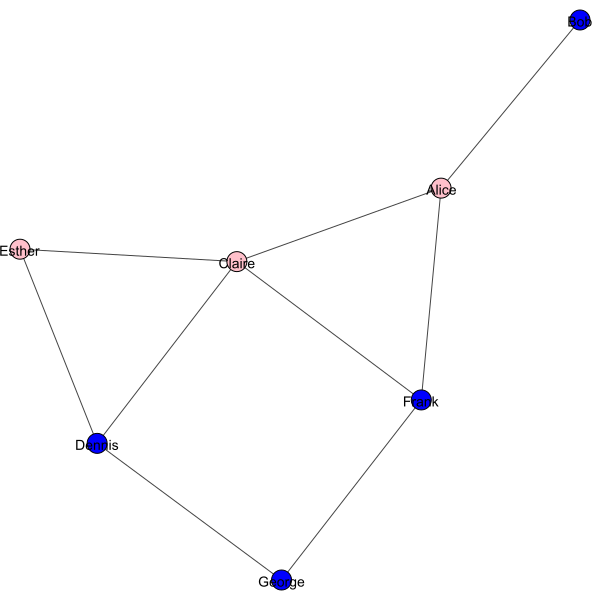

In [5]:
layout = g.layout("kk")
g.vs["label"] = g.vs["Nome"]
plot(g, layout = layout)

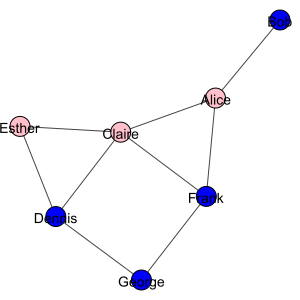

In [11]:
g.vs["label"] = g.vs["Nome"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["Gênero"]]
plot(g, layout = layout, bbox = (300, 300), margin = 20)

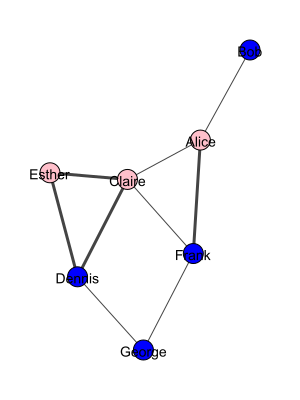

In [9]:
>>> visual_style = {}
>>> visual_style["vertex_size"] = 20
>>> visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["Gênero"]]
>>> visual_style["vertex_label"] = g.vs["Nome"]
>>> visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["CONHECE"]]
>>> visual_style["layout"] = layout
>>> visual_style["bbox"] = (300, 400)
>>> visual_style["margin"] = 50
>>> plot(g, **visual_style)

[Atributos](https://igraph.org/python/doc/tutorial/tutorial.html#vertex-attributes-controlling-graph-plots) para brincar com os grafos.

In [2]:
# Grafo utilizável para manipular exemplos, visualizá-los.
g = Graph()
g.add_vertices(6)
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

g.vs["Nome"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["Idade"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["Gênero"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["CONHECE"] = [False, False, True, True, True, False, True, False, False]

[51.45561251007897, 21.007661639760475, 62.8006114932218, 48.45505393296686, 33.502633318555, 48.79552498377001, 33.98290212164688]


In [15]:
g.community_walktrap(par).as_clustering()

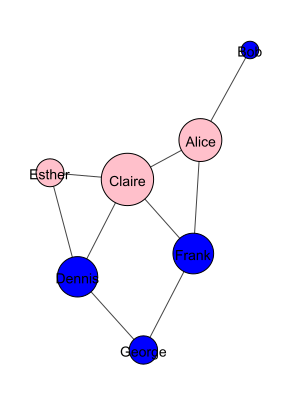

In [18]:
# Utilização de pagerank() + layout

par = None
par = g.es.edge_betweenness()

pag = g.pagerank()
pag_m = []

for i in range(len(pag)):
    pag_m.append(pag[i]*250)

g.vs["label"] = g.vs["Nome"]
color_dict = {"m": "blue", "f": "pink"}

visual_style = {}
visual_style["vertex_size"] = pag_m
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["Gênero"]]
visual_style["vertex_label"] = g.vs["Nome"]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 400)
visual_style["margin"] = 50
plot(g, **visual_style)